In [51]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
df = pd.read_csv('belchior.csv',sep='¢')

/home/lucascabral/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [53]:
df

,Unnamed: 0,titulo,mais tocada,letra
0,0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...
1,1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...
2,2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...
3,3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri..."
4,4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma..."
5,5,Apenas Um Rapaz Latino Americano,1,Eu sou apenas um rapaz latino-americano Sem di...
6,6,Arte Final,0,"Desculpe qualquer coisa, passe outro dia, Agor..."
7,7,Até Amanhã,0,Até amanhã Se o homem quiser - mesmo se chover...
8,8,Ate Mais Ver,0,"Ate mais ver, ate mais ver, meu camarada. Cont..."
9,9,Bahiuno,0,Já que o tempo fez-te a graça de visitares o N...


In [54]:
list(df['letra'])

['Se você vier me perguntar por onde andei No tempo em que você sonhava De olhos abertos, lhe direi Amigo, eu me desesperava </p>Sei que assim falando pensas Que esse desespero é moda em 76 Mas ando mesmo descontente Desesperadamente, eu grito em português Mas ando mesmo descontente Desesperadamente, eu grito em português</p>Tenho vinte e cinco anos De sonho e de sangue E de América do Sul Por força deste destino Um tango argentino  Me vai bem melhor que um blues</p>Sei que assim falando pensas Que esse desespero é moda em 76 E eu quero é que esse canto torto Feito faca, corte a carne de vocês E eu quero é que esse canto torto Feito faca, corte a carne de vocês</p>Tenho vinte e cinco anos De sonho e de sangue E de América do Sul Por força deste destino Um tango argentino  Me vai bem melhor que um blues</p>Sei que assim falando, pensas Que esse desespero é moda em 76 E eu quero é que esse canto torto Feito faca, corte a carne de vocês E eu quero é que esse canto torto Feito faca, corte 

# Contagem de palavras

In [55]:
df['letra'] = [letra.replace('</p>',' ') for letra in df['letra']]
df['tamanho'] = [len(letra) for letra in df['letra']]

,Unnamed: 0,titulo,mais tocada,letra,tamanho
0,0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,1000
1,1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,1389
2,2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,2083
3,3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",1054
4,4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",665
5,5,Apenas Um Rapaz Latino Americano,1,Eu sou apenas um rapaz latino-americano Sem di...,1917
6,6,Arte Final,0,"Desculpe qualquer coisa, passe outro dia, Agor...",1775
7,7,Até Amanhã,0,Até amanhã Se o homem quiser - mesmo se chover...,404
8,8,Ate Mais Ver,0,"Ate mais ver, ate mais ver, meu camarada. Cont...",373
9,9,Bahiuno,0,Já que o tempo fez-te a graça de visitares o N...,1819


In [56]:
df.sort_values(by='tamanho', ascending=False).head(20)

,Unnamed: 0,titulo,mais tocada,letra,tamanho
78,78,Rock Romance de Um Robô Goliardo,0,Alô rapaziada! Alô gente fina! Alô moçada! Eu ...,3766
44,44,Jornal Blues (Canção Leve de Escárnio e Maldizer),0,"Nesta terra de doutores, magníficos reitores, ...",2333
2,2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,2083
47,47,Lamento do Marginal Bem Sucedido,0,Baby Enquanto um velho mestre de blues radioat...,2012
5,5,Apenas Um Rapaz Latino Americano,1,Eu sou apenas um rapaz latino-americano Sem di...,1917
10,10,Baihuno,0,Já que o tempo fez-te a graça de visitares o N...,1841
9,9,Bahiuno,0,Já que o tempo fez-te a graça de visitares o N...,1819
6,6,Arte Final,0,"Desculpe qualquer coisa, passe outro dia, Agor...",1775
11,11,Balada de Madame Frigidaire,0,Ando pós-modernamente apaixonado pela nova gel...,1715
41,41,Fotografia 3X4,1,Eu me lembro muito bem do dia que eu cheguei J...,1678


In [57]:
df.sort_values(by='tamanho', ascending=True).head(20)

,Unnamed: 0,titulo,mais tocada,letra,tamanho
43,43,Humano Hum,0,"Lavrar a palavra a pá, Como quem prepara um pã...",193
21,21,Carisma,0,Deu a vida pelos seus: isto é mais forte que a...,290
89,89,Viva La Dolcezza,0,"Daqui da zona fantasma, te mando minha lagrima...",299
19,19,Brotinho de Bambu,0,Oh! Meu brotinho de bambú Delicadeza de rosal ...,346
8,8,Ate Mais Ver,0,"Ate mais ver, ate mais ver, meu camarada. Cont...",373
7,7,Até Amanhã,0,Até amanhã Se o homem quiser - mesmo se chover...,404
68,68,Paraíso (1982),0,"Graças a Deus, eu perco sempre o juízo Meu par...",430
59,59,No Maior Jazz,0,"Guerra, Guerra sem paz! E que se fez da terra,...",479
13,13,Bebelo,0,b be bel b belo be belo belo bel be...,498
82,82,Senhoras do Amazonas,0,"Rio, vim saber de ti e vi. Vi teu tropical sem...",499


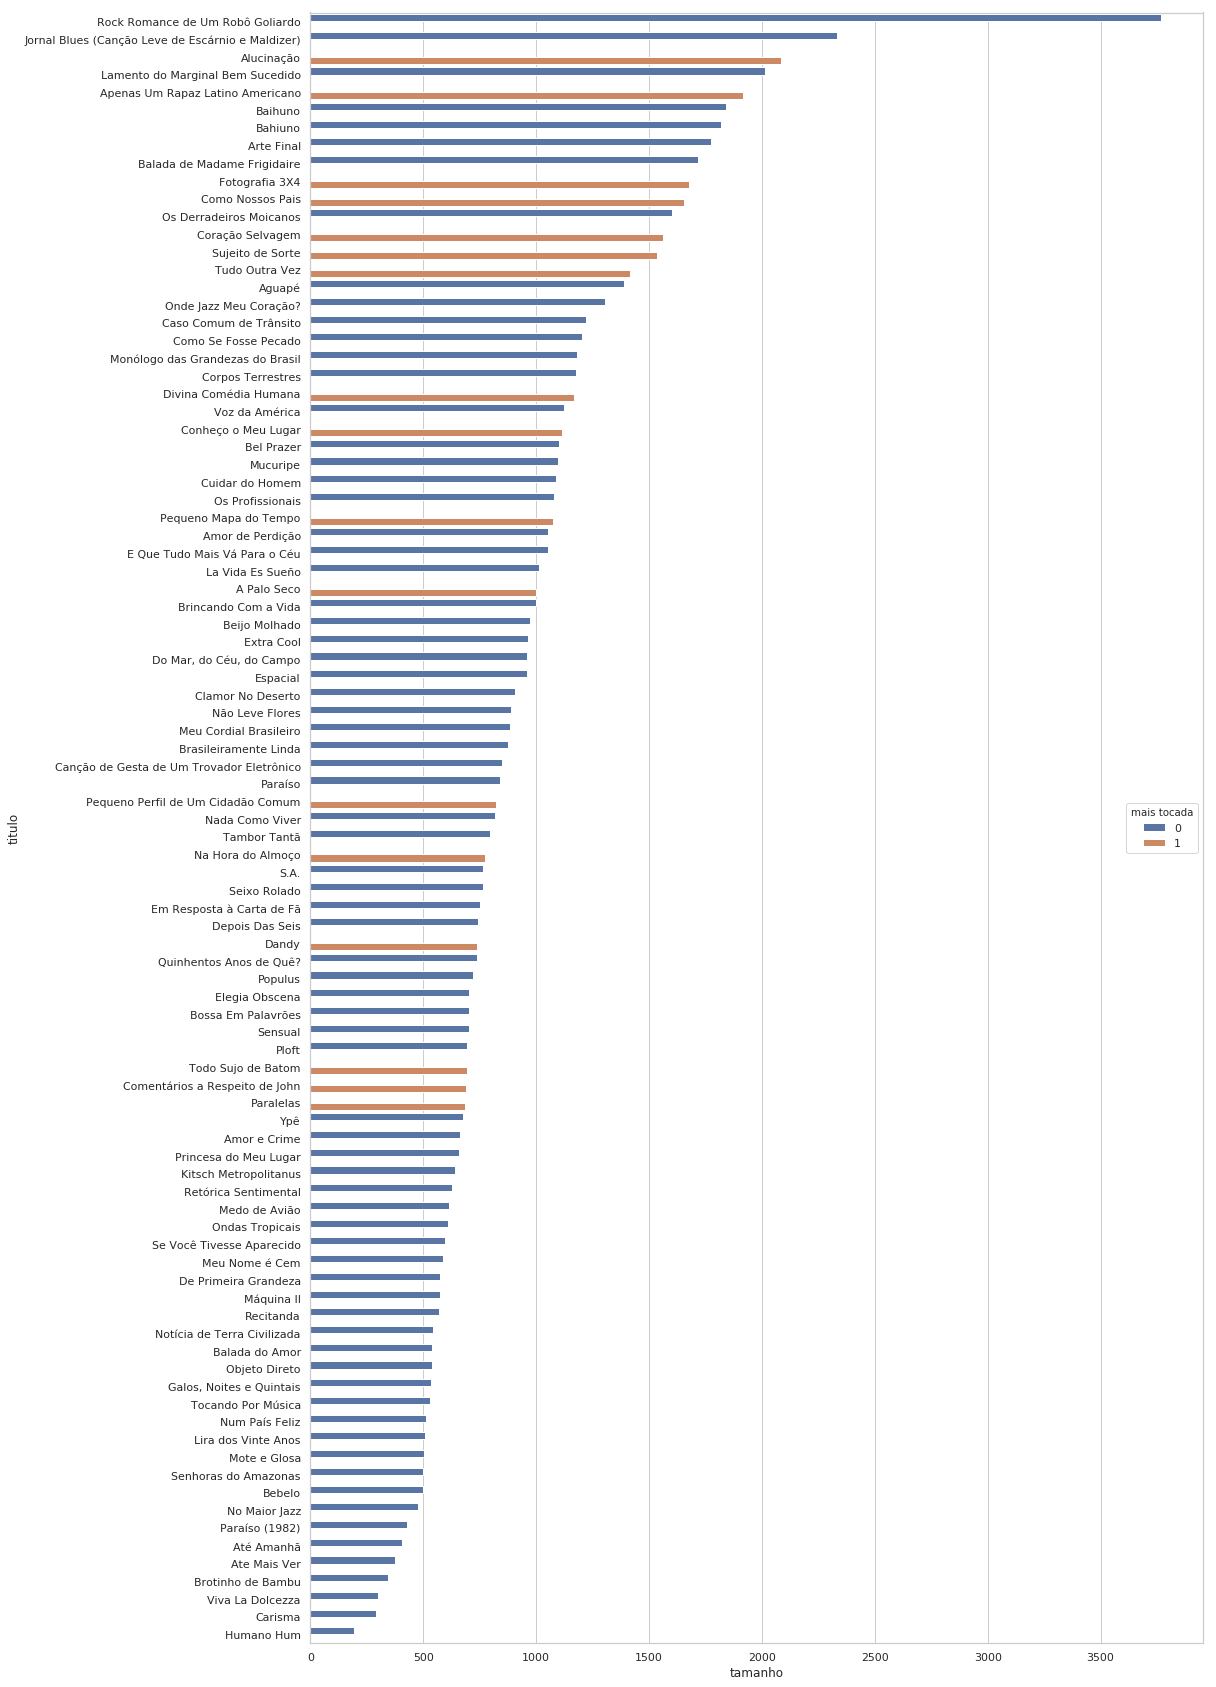

In [118]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
sns.barplot(y="titulo", x="tamanho", hue="mais tocada", data=df.sort_values(by='tamanho', ascending=False))

# Termos mais frequentes

## Remover stopwords

In [105]:
stopwords_pt = []
with open('stopwords.txt') as f:
       for line in f:
            line = line.replace(' ','')
            line = line.replace('\n','')
            stopwords_pt.append(line)
stopwords_pt.append('pra')
print(stopwords_pt)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estav

In [60]:
# stopwords em inglês
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lucascabral/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
stopwords_en = stopwords.words('english')
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Limpeza e Normalização

In [91]:
def normalize_text(txt):
    txt = txt.lower()
    txt = txt.replace(',','')
    txt = txt.replace(';','')
    txt = txt.replace('.','')
    #txt = txt.replace('\'','')
    txt = txt.replace('(','')
    txt = txt.replace(')','')
    txt = txt.replace(':','')
    txt = txt.replace('!','')
    txt = txt.replace('?','')
    txt = txt.replace("\","")
    txt = txt.replace('</p>','')
    return txt

SyntaxError: EOL while scanning string literal (<ipython-input-91-aede62f0a16d>, line 12)

### Todas as letras em uma lista, removendo stopwords e normalizando

In [92]:
todas_letras = ' '.join(list(df['letra']))
todas_letras = normalize_text(todas_letras)
todas_letras

'se você vier me perguntar por onde andei no tempo em que você sonhava de olhos abertos lhe direi amigo eu me desesperava  sei que assim falando pensas que esse desespero é moda em 76 mas ando mesmo descontente desesperadamente eu grito em português mas ando mesmo descontente desesperadamente eu grito em português tenho vinte e cinco anos de sonho e de sangue e de américa do sul por força deste destino um tango argentino  me vai bem melhor que um blues sei que assim falando pensas que esse desespero é moda em 76 e eu quero é que esse canto torto feito faca corte a carne de vocês e eu quero é que esse canto torto feito faca corte a carne de vocês tenho vinte e cinco anos de sonho e de sangue e de américa do sul por força deste destino um tango argentino  me vai bem melhor que um blues sei que assim falando pensas que esse desespero é moda em 76 e eu quero é que esse canto torto feito faca corte a carne de vocês e eu quero é que esse canto torto feito faca corte a carne de vocês  capinei

In [80]:
len(todas_letras)

88042

## Tokenização

In [100]:
from nltk import tokenize    
palavras= tokenize.word_tokenize(todas_letras, language='portuguese')
print(palavras)

['se', 'você', 'vier', 'me', 'perguntar', 'por', 'onde', 'andei', 'no', 'tempo', 'em', 'que', 'você', 'sonhava', 'de', 'olhos', 'abertos', 'lhe', 'direi', 'amigo', 'eu', 'me', 'desesperava', 'sei', 'que', 'assim', 'falando', 'pensas', 'que', 'esse', 'desespero', 'é', 'moda', 'em', '76', 'mas', 'ando', 'mesmo', 'descontente', 'desesperadamente', 'eu', 'grito', 'em', 'português', 'mas', 'ando', 'mesmo', 'descontente', 'desesperadamente', 'eu', 'grito', 'em', 'português', 'tenho', 'vinte', 'e', 'cinco', 'anos', 'de', 'sonho', 'e', 'de', 'sangue', 'e', 'de', 'américa', 'do', 'sul', 'por', 'força', 'deste', 'destino', 'um', 'tango', 'argentino', 'me', 'vai', 'bem', 'melhor', 'que', 'um', 'blues', 'sei', 'que', 'assim', 'falando', 'pensas', 'que', 'esse', 'desespero', 'é', 'moda', 'em', '76', 'e', 'eu', 'quero', 'é', 'que', 'esse', 'canto', 'torto', 'feito', 'faca', 'corte', 'a', 'carne', 'de', 'vocês', 'e', 'eu', 'quero', 'é', 'que', 'esse', 'canto', 'torto', 'feito', 'faca', 'corte', 'a', 

In [106]:
from string import punctuation
stopwords = set(stopwords_pt + list(punctuation) + stopwords_en)
tokens = [palavra for palavra in palavras if palavra not in stopwords]
print(tokens)

['vier', 'perguntar', 'onde', 'andei', 'tempo', 'sonhava', 'olhos', 'abertos', 'direi', 'amigo', 'desesperava', 'sei', 'assim', 'falando', 'pensas', 'desespero', 'moda', '76', 'ando', 'descontente', 'desesperadamente', 'grito', 'português', 'ando', 'descontente', 'desesperadamente', 'grito', 'português', 'vinte', 'cinco', 'anos', 'sonho', 'sangue', 'américa', 'sul', 'força', 'deste', 'destino', 'tango', 'argentino', 'vai', 'bem', 'melhor', 'blues', 'sei', 'assim', 'falando', 'pensas', 'desespero', 'moda', '76', 'quero', 'canto', 'torto', 'feito', 'faca', 'corte', 'carne', 'quero', 'canto', 'torto', 'feito', 'faca', 'corte', 'carne', 'vinte', 'cinco', 'anos', 'sonho', 'sangue', 'américa', 'sul', 'força', 'deste', 'destino', 'tango', 'argentino', 'vai', 'bem', 'melhor', 'blues', 'sei', 'assim', 'falando', 'pensas', 'desespero', 'moda', '76', 'quero', 'canto', 'torto', 'feito', 'faca', 'corte', 'carne', 'quero', 'canto', 'torto', 'feito', 'faca', 'corte', 'carne', 'capineiro', 'pai', 'cor

## Distribuição de frequências

In [94]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/lucascabral/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [107]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
fdist = FreqDist()
for word in tokens:
    fdist[word.lower()] += 1

In [113]:
df_freq = pd.DataFrame(list(fdist.items()), columns = ["termo","frequencia"])
df_freq.head(10)

,termo,frequencia
0,vier,7
1,perguntar,1
2,onde,32
3,andei,3
4,tempo,35
5,sonhava,2
6,olhos,4
7,abertos,1
8,direi,3
9,amigo,13


In [114]:
df_freq.sort_values(by='frequencia', ascending=False).head(25)

,termo,frequencia
114,nada,79
223,amor,77
224,vida,74
289,tudo,68
39,quero,61
281,oh,57
544,novo,53
1702,medo,51
36,bem,47
434,gente,38


In [115]:
df_freq.sort_values(by='frequencia', ascending=True).head(25)

,termo,frequencia
1604,pone,1
2067,descobri,1
2074,lacrimoso,1
2075,adoçava,1
2077,bagaço,1
2078,engenho,1
2079,ganhava,1
2081,milho,1
2082,ondeia,1
2084,marinho,1


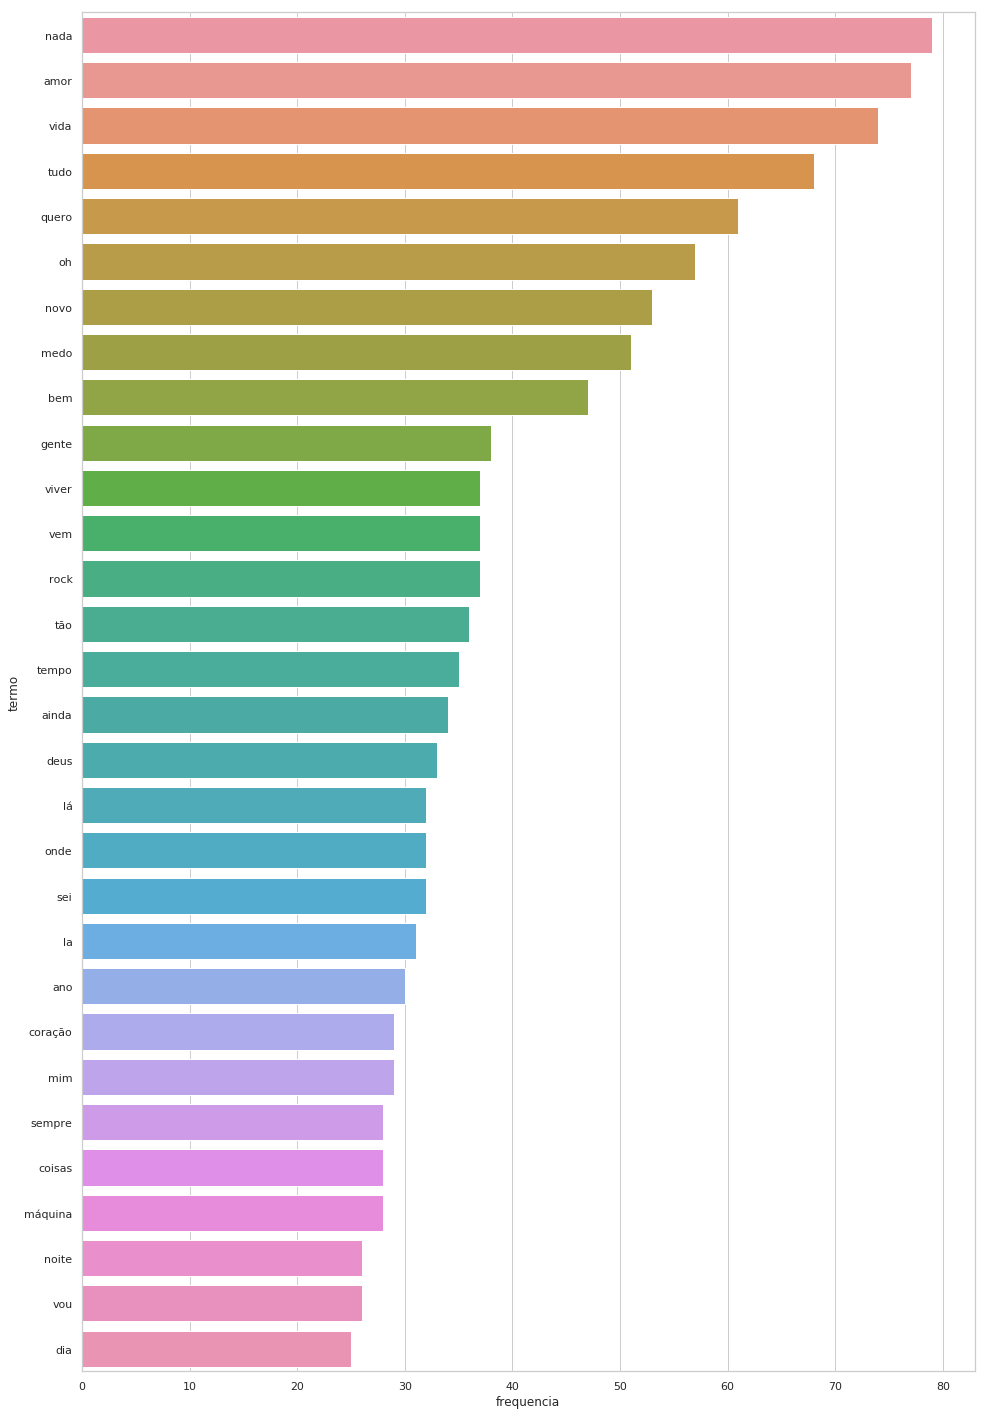

In [117]:
plt.figure(figsize=(16, 25))
sns.barplot(y="termo", x="frequencia", data=df_freq.sort_values(by='frequencia', ascending=False).head(30))

## Vetorização TF-IDF

In [63]:
letras = list(df['letra'])
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(letras)
print(vectorizer.get_feature_names())

['3x4', '45', '76', 'abacaxi', 'abaixo', 'abandona', 'abandonada', 'abandonados', 'abandonei', 'abandono', 'abarcar', 'aberta', 'aberto', 'abertos', 'abiertas', 'abismo', 'abra', 'abrace', 'abraçam', 'abraçar', 'abraço', 'abre', 'abrigos', 'abrir', 'abro', 'absolutamente', 'absque', 'acabar', 'acabou', 'acaso', 'aceito', 'acenas', 'acenda', 'acervus', 'achar', 'acho', 'acompanhar', 'acontece', 'acontecem', 'acontecendo', 'acontecer', 'acontecerá', 'aconteceu', 'aconteça', 'acorda', 'acordava', 'acordeón', 'acreditava', 'acredite', 'acreditou', 'acústica', 'ad', 'adelita', 'adentro', 'adeus', 'admire', 'adolescente', 'adolescentulae', 'adolescência', 'adoçava', 'adão', 'aeromoça', 'aeroporto', 'afastado', 'afastam', 'afinal', 'afins', 'afirmar', 'aflor', 'afoito', 'africaines', 'africaribe', 'afrique', 'age', 'agitadas', 'agora', 'agouro', 'agradar', 'agradeço', 'agrum', 'aguapé', 'aguenta', 'aguente', 'agá', 'agüenta', 'ah', 'ahh', 'ai', 'ainda', 'ajude', 'al', 'alain', 'alas', 'alavan

In [64]:
print(X.shape)

(92, 3536)
